# 🧠 IVT Traffic Analysis Assignment

This notebook analyzes traffic data from 6 apps (`Valid 1–3` and `Invalid 1–3`) to identify patterns associated with **Invalid Traffic (IVT)**.

**Objective:**
- Compare traffic patterns between Valid and Invalid apps.
- Identify metrics that explain why certain apps were flagged IVT earlier or later.
- Generate visuals and summary tables for the final report.

In [11]:
# 1️⃣ Setup and Load Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

file_path = 'Data Analytics Assignment.xlsx'
excel = pd.ExcelFile(file_path)
print('Sheets found:', excel.sheet_names)

# Load all sheets and tag them
dfs = []
for sheet in excel.sheet_names:
    temp = pd.read_excel(excel, sheet_name=sheet)
    temp['app_name'] = sheet
    temp['group'] = 'Valid' if 'Valid' in sheet else 'Invalid'
    dfs.append(temp)

df = pd.concat(dfs, ignore_index=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df.head()

Sheets found: ['Valid 1', 'Valid 2', 'Valid 3', 'Invalid 1', 'Invalid 2', 'Invalid 3']


,Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT,app_name,group
0,2025-09-11 14:00:00,3535,3535,17,3577,1.011881,0,0,1.0,207.941176,0.010695,Valid 1,Valid
1,2025-09-11 15:00:00,7254,7254,17,7361,1.014750,0,0,1.0,426.705882,0.000000,Valid 1,Valid
2,2025-09-11 16:00:00,13737,13737,17,14073,1.024459,0,0,1.0,808.058824,0.000000,Valid 1,Valid
3,2025-09-11 17:00:00,13800,13800,18,14074,1.019855,0,0,1.0,766.666667,0.006250,Valid 1,Valid
4,2025-09-11 18:00:00,8696,8696,19,8796,1.011500,0,0,1.0,457.684211,0.000000,Valid 1,Valid


In [12]:
# 2️⃣ Data Overview
print(df.info())
display(df.describe())
print('\nApps included:', df['app_name'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  504 non-null    datetime64[ns]
 1   unique_idfas          504 non-null    int64         
 2   unique_ips            504 non-null    int64         
 3   unique_uas            504 non-null    int64         
 4   total_requests        504 non-null    int64         
 5   requests_per_idfa     504 non-null    float64       
 6   impressions           504 non-null    int64         
 7   impressions_per_idfa  504 non-null    int64         
 8   idfa_ip_ratio         504 non-null    float64       
 9   idfa_ua_ratio         504 non-null    float64       
 10  IVT                   504 non-null    float64       
 11  app_name              504 non-null    object        
 12  group                 504 non-null    object        
dtypes: datetime64[ns](1)

,Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
count,504,504.000000,504.000000,504.000000,504.000000,504.000000,504.0,504.0,504.000000,504.000000,504.000000
mean,2025-09-13 07:30:00,12829.904762,12824.827381,165.829365,13554.992063,1.044819,0.0,0.0,1.000314,321.353745,0.387825
min,2025-09-11 14:00:00,1125.000000,1125.000000,17.000000,1133.000000,1.003364,0.0,0.0,1.000000,4.955357,0.000000
25%,2025-09-12 10:45:00,6419.250000,6417.750000,22.000000,6591.750000,1.020953,0.0,0.0,1.000000,46.720046,0.004255
50%,2025-09-13 07:30:00,9788.000000,9786.000000,131.500000,10187.000000,1.038160,0.0,0.0,1.000120,78.479310,0.041209
75%,2025-09-14 04:15:00,14891.000000,14877.000000,171.250000,15677.250000,1.065145,0.0,0.0,1.000378,492.348611,1.000000
max,2025-09-15 01:00:00,97985.000000,97975.000000,855.000000,105699.000000,1.524128,0.0,0.0,1.003090,4665.952381,1.000000
std,NaN,11433.048267,11429.715568,174.844022,12405.878582,0.039179,0.0,0.0,0.000487,537.290201,0.473589



Apps included: ['Valid 1' 'Valid 2' 'Valid 3' 'Invalid 1' 'Invalid 2' 'Invalid 3']


In [13]:
# 3️⃣ Group Summaries
app_summary = df.groupby('app_name')[['requests_per_idfa', 'idfa_ua_ratio', 'IVT']].mean().reset_index()
group_summary = df.groupby('group')[['requests_per_idfa', 'idfa_ua_ratio', 'IVT']].mean().reset_index()

print('Average metrics per app:')
display(app_summary)
print('\nAverage metrics by Valid/Invalid group:')
display(group_summary)

Average metrics per app:


,app_name,requests_per_idfa,idfa_ua_ratio,IVT
0,Invalid 1,1.033714,76.242144,0.816108
1,Invalid 2,1.024690,11.570719,0.911116
2,Invalid 3,1.074001,77.729143,0.535350
3,Valid 1,1.031473,1024.944673,0.004276
4,Valid 2,1.043325,82.403649,0.056052
5,Valid 3,1.061711,655.232143,0.004050



Average metrics by Valid/Invalid group:


,group,requests_per_idfa,idfa_ua_ratio,IVT
0,Invalid,1.044135,55.180669,0.754191
1,Valid,1.045503,587.526822,0.021459


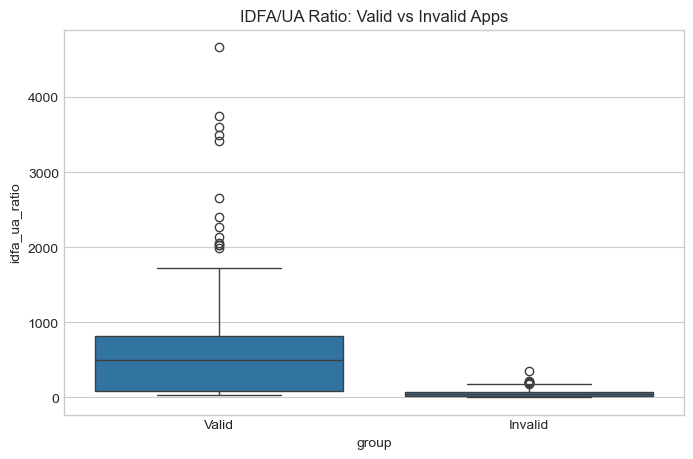

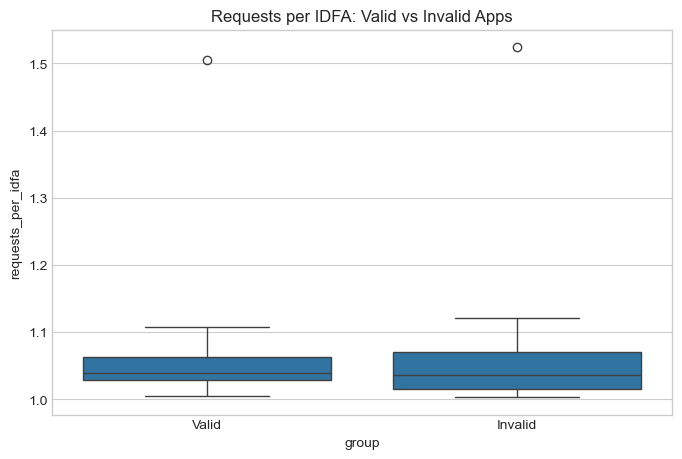

In [14]:
# 4️⃣ Visual Analysis
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='group', y='idfa_ua_ratio')
plt.title('IDFA/UA Ratio: Valid vs Invalid Apps')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='group', y='requests_per_idfa')
plt.title('Requests per IDFA: Valid vs Invalid Apps')
plt.show()

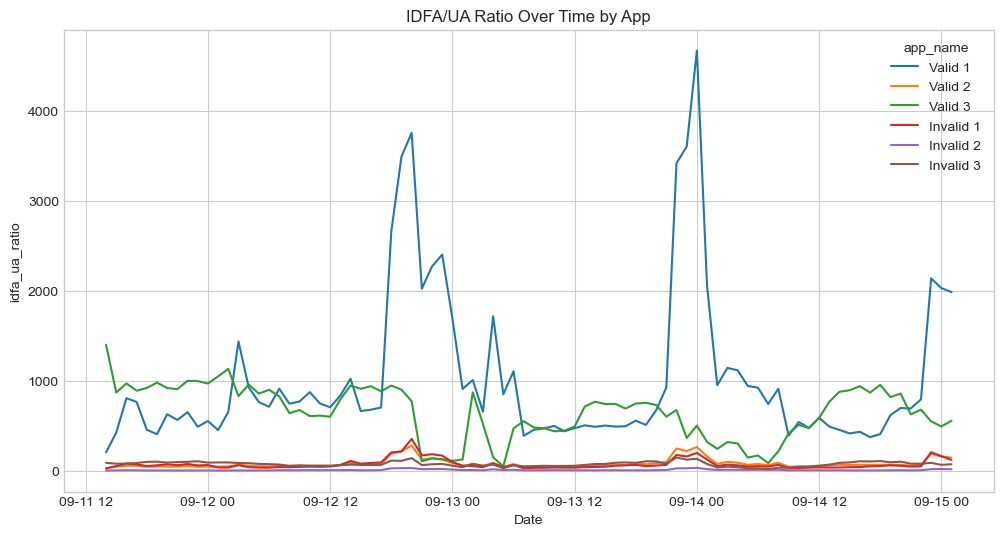

In [15]:
# 5️⃣ Time Series Analysis
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='idfa_ua_ratio', hue='app_name')
plt.title('IDFA/UA Ratio Over Time by App')
plt.show()

In [16]:
# 6️⃣ Export Summary
summary = df.groupby(['group', 'app_name'])[['requests_per_idfa', 'idfa_ua_ratio', 'IVT']].mean().reset_index()
summary.to_excel('IVT_App_Summary.xlsx', index=False)
print('✅ Summary exported successfully: IVT_App_Summary.xlsx')

✅ Summary exported successfully: IVT_App_Summary.xlsx


In [17]:
# 7️⃣ Detect IVT Spikes by App

import numpy as np

def detect_ivt_spikes(data, threshold=None):
    """Find the first timestamp when IVT increases sharply for each app."""
    results = []
    for app, sub in data.groupby('app_name'):
        sub = sub.sort_values('Date')
        sub['ivt_change'] = sub['IVT'].diff()

        # Dynamic threshold: mean + 2*std if not provided
        th = threshold if threshold else (sub['ivt_change'].mean() + 2 * sub['ivt_change'].std())

        # Find first significant jump
        spike = sub[sub['ivt_change'] > th]
        if not spike.empty:
            first_spike = spike.iloc[0]
            results.append({
                'app_name': app,
                'first_IVT_spike_time': first_spike['Date'],
                'IVT_value': first_spike['IVT'],
                'ivt_change': first_spike['ivt_change']
            })
        else:
            results.append({
                'app_name': app,
                'first_IVT_spike_time': None,
                'IVT_value': None,
                'ivt_change': None
            })
    return pd.DataFrame(results)

# Run detection
ivt_spike_summary = detect_ivt_spikes(df)
print("📈 IVT Spike Detection Summary:")
display(ivt_spike_summary)

# Merge spike times into summary for context
summary_with_spikes = summary.merge(ivt_spike_summary, on='app_name', how='left')
summary_with_spikes.to_excel('IVT_App_Summary_with_Spikes.xlsx', index=False)
print("✅ Updated summary with spike times exported as: IVT_App_Summary_with_Spikes.xlsx")

📈 IVT Spike Detection Summary:


,app_name,first_IVT_spike_time,IVT_value,ivt_change
0,Invalid 1,2025-09-12 05:00:00,0.620690,0.493929
1,Invalid 2,2025-09-11 21:00:00,0.714286,0.714286
2,Invalid 3,2025-09-13 04:00:00,0.201389,0.201389
3,Valid 1,2025-09-13 20:00:00,0.015267,0.015267
4,Valid 2,2025-09-11 17:00:00,0.100000,0.075610
5,Valid 3,2025-09-12 02:00:00,0.020513,0.020513


✅ Updated summary with spike times exported as: IVT_App_Summary_with_Spikes.xlsx


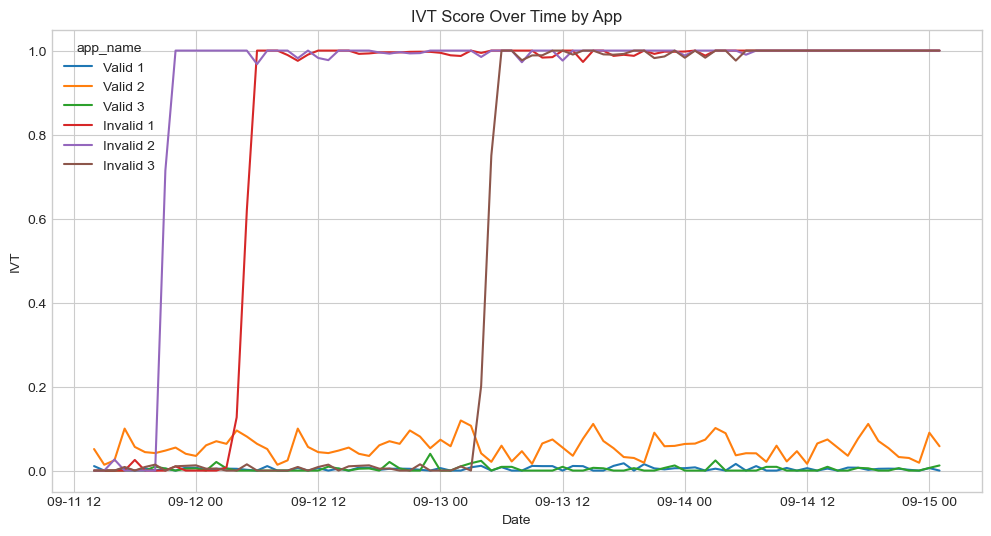

In [18]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='IVT', hue='app_name')
plt.title('IVT Score Over Time by App')
plt.show()

## 🧠 Interpretation Guide

When writing your report:

- **Valid Apps:** Maintain realistic metrics and consistent ad delivery (low `idfa_ua_ratio`, stable impressions).
- **Invalid Apps:** Show spikes in `idfa_ua_ratio` (hundreds of devices per UA) and often zero impressions.
- **IVT Patterns:** Sudden increases in requests or UA ratios are precursors to IVT detection.

This explains why some apps were marked IVT earlier or later — their traffic became increasingly inconsistent or bot-like over time.